<a href="https://colab.research.google.com/github/MithunCm29/MachineLearning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

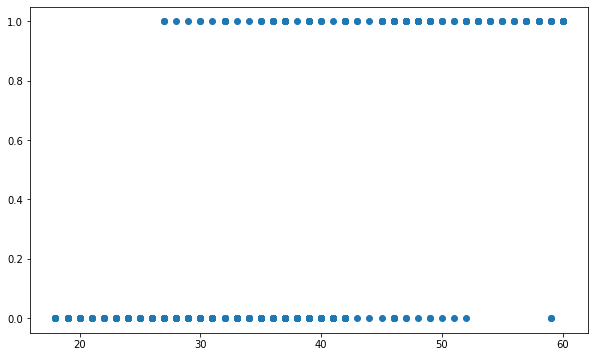

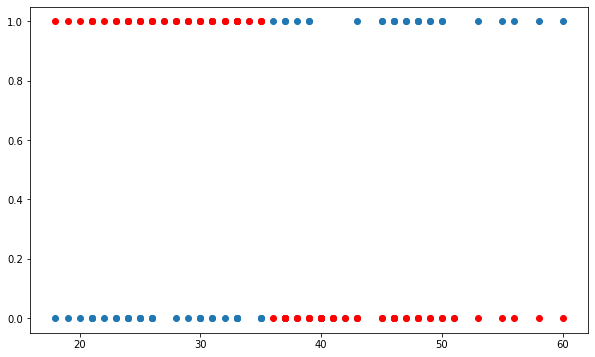

Accuracy = 0.2625


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
#plt.rcParams["figure.figsize"] = (10, 6)
data = pd.read_csv("Social_Network_Ads.csv")
#print(data.head())
# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20)
#print(y_test)
def normalize(X):
  return X-X.mean()
def predict(X, b0, b1):
  return np.array([1/(1+exp(-1*b0-1*b1*x)) for x in X])
#print(normalize(X_train))
#print(predict(X_train, 2,1))
def Logistic_regression(X,Y):
  X=normalize(X)
  b0=0
  b1=0
  L=0.001
  epochs=300
  for epoch in range(epochs):
    y_pred=predict(X, b0, b1)
    D_b0=-2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
    D_b1=-2*sum((Y-y_pred)*y_pred*(1-y_pred))
    b0=b0-L*D_b0
    b1=b1-L*D_b1
  return b0, b1
[b0, b1]=Logistic_regression(X_train, y_train)
# Making predictions
X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c="red")
plt.show()

# The accuracy
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")


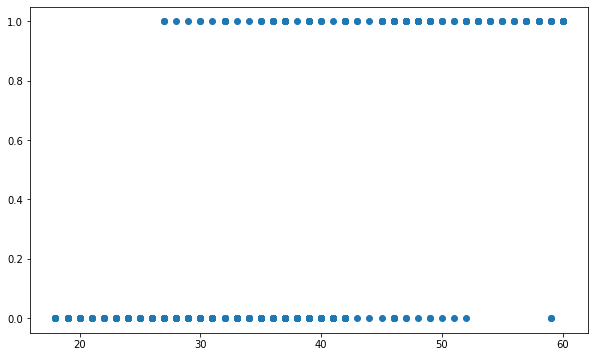

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


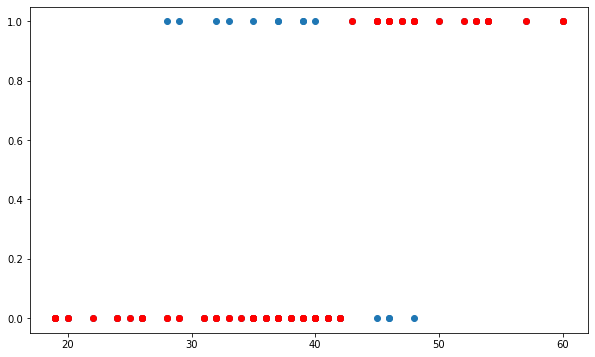

Accuracy = 0.825


In [ ]:
#Using Imported model from sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
#plt.rcParams["figure.figsize"] = (10, 6)
data = pd.read_csv("Social_Network_Ads.csv")
#print(data.head())
# Visualizing the dataset
plt.scatter(data['Age'], data['Purchased'])
plt.show()

# Divide the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(data['Age'], data['Purchased'], test_size=0.20)
# Making predictions using scikit learn
from sklearn.linear_model import LogisticRegression

# Create an instance and fit the model 
lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Making predictions
y_pred_sk = lr_model.predict(X_test.values.reshape(-1, 1))

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

# Accuracy
print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")
